<h2>VAR model<h2/>

In [167]:
from path import Path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [168]:
np.random.seed(21)
path_to_processed_data = Path.joinpath("..",
    "data", "processed"
)
path_to_result_data = Path.joinpath("..",
    "reports", "figures"
)

In [169]:
SIZE = 1100
LOC = 70
SCALE = 30
NOISE_LOC = 0.05 * LOC
NOISE_SCALE = 0.05 * SCALE

In [170]:
x0 = np.zeros(SIZE)
x1 = np.zeros(SIZE)
x2 = np.zeros(SIZE)
x3 = np.zeros(SIZE)
x4 = np.zeros(SIZE)
x5 = np.zeros(SIZE)
x6 = np.zeros(SIZE)
x7 = np.zeros(SIZE)
x8 = np.zeros(SIZE)
x9 = np.zeros(SIZE)

In [171]:
x_vars = np.array([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9])
for x in x_vars:
    x += np.random.normal(NOISE_LOC, NOISE_SCALE, SIZE)

In [172]:
# x_vars = np.array([x1, x2, x3, x8])
# for x in x_vars:
#     x += np.random.normal(NOISE_LOC, NOISE_SCALE, SIZE)

# #x2 = 0.2x2(t-8) + 0.7x2(t-2)
# for i in range(8, SIZE):
#     x2[i] = 0.2 * x2[i - 8] + 0.7 * x2[i - 2]
# #x8 = 0.1x8(t-1) + 0.7x8(t-2)
# for i in range(2, SIZE):
#     x8[i] = 0.1 * x8[i - 1] + 0.7 * x8[i - 2]
# #x1 = 0.4x2(t-2) + 0.4x1(t-1)
# for i in range(4, SIZE):
#     x1[i] = 0.4 * x2[i -2] + 0.4 * x1[i - 1]
# #x3 = 0.2x8(t-8) + 0.6x3(t-3)
# for i in range(8, SIZE):
#     x3[i] = 0.2 * x8[i - 8] + 0.6 * x3[i - 3] 

In [173]:
#x0 = 0.5x0(t-4) + 0.4x0(t-1)
for i in range(4, SIZE):
    x0[i] = 0.5 * x0[i -4] + 0.4 * x0[i - 1]
#x2 = 0.2x2(t-8) + 0.7x2(t-2)
for i in range(8, SIZE):
    x2[i] = 0.2 * x2[i - 8] + 0.7 * x2[i - 2]
#x4 = 0.4x4(t-9) + 0.3x4(t-5)
for i in range(9, SIZE):
    x4[i] = 0.4 * x4[i - 9] + 0.3 * x4[i - 5]
#x6 = 0.7x6(t-6) + 0.2x6(t-5)
for i in range(6, SIZE):
    x6[i] = 0.7 * x6[i - 6] + 0.2 * x6[i - 5]
#x8 = 0.1x8(t-1) + 0.7x8(t-2)
for i in range(2, SIZE):
    x8[i] = 0.1 * x8[i - 1] + 0.7 * x8[i - 2]

In [174]:
#x1 = 0.4x2(t-2) + 0.4x1(t-1)
for i in range(4, SIZE):
    x1[i] = 0.4 * x2[i -2] + 0.4 * x1[i - 1]
#x3 = 0.2x8(t-8) + 0.6x3(t-3)
for i in range(8, SIZE):
    x3[i] = 0.2 * x8[i - 8] + 0.6 * x3[i - 3] 

### TARGET VARS ###

#x5 = 0.3x5(t-2) + 0.2x5(t-6)
for i in range(9, SIZE):
    x5[i] = 0.3 * x5[i - 2] + 0.2 * x5[i - 6]

#x7 = 0.2x1(t-6) + 0.6x1(t-2) + 0.5x5(t-2) + 0.3(x5(t-8))^2 + 0.3x7(t-4) 
#     + 0.5x8(t-1) + 0.2x4(t-3) + 0.5x4(t-9) + 0.4x8(t-5)
for i in range(6, SIZE):
    x7[i] = 0.2*x1[i-6] + 0.6*x1[i-2] + 0.5*x5[i-2] + 0.3*(x5[i-8])**2 +\
        0.3*x7[i-4] + 0.5*x8[i-1] + 0.2*x4[i-3] + 0.5*x4[i-9] + 0.4*x8[i-5]
    
#x9 = 0.6x9(t-3) + 0.3x3(t-2) + 0.6(x3(t-7))^2 + 0.5x6(t-1) + 0.2x6(t-5) 
#     + 0.4x0(t-9) + 0.2x0(t-7) + 0.5(x2(t-6))^3 + 0.8x2(t-1)
for i in range(2, SIZE):
    x9[i] = 0.6*x9[i-3] + 0.3*x3[i-2] + 0.6*(x3[i-7])**2 + 0.5*x6[i-1] +\
        0.2*x6[i-5] + 0.4*x0[i-9] + 0.2*x0[i-7] + 0.5*(x2[i-6])**3 + 0.8*x2[i-1]

In [175]:

x_vars = x_vars[:, 100:]
x_vars /= np.repeat([np.max(x_vars, axis=1)], SIZE - 100, axis=0).transpose()

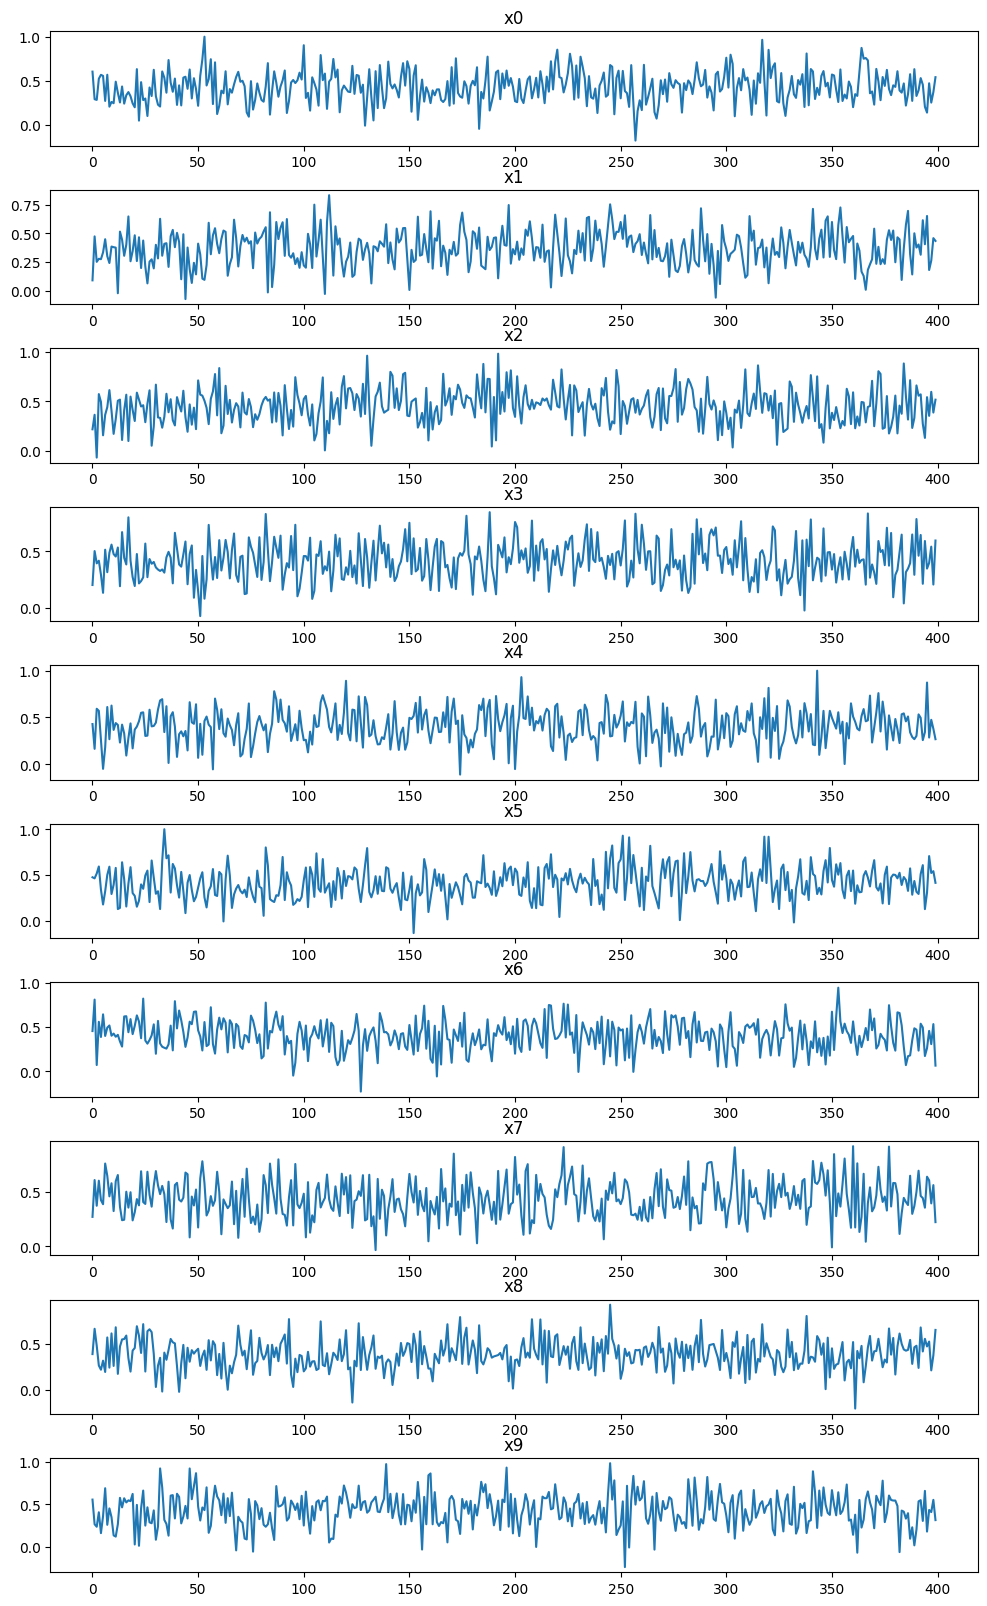

In [176]:
fig, axes = plt.subplots(nrows=len(x_vars), ncols=1, figsize=(10, 16))
plt.tight_layout()
for i in range(len(x_vars)):
    axes[i].plot(x_vars[i][:400])
    axes[i].set_title("x" + str(i))

In [177]:
results_path = Path.joinpath(
    path_to_result_data,
    "var_plots.png",
)
fig.savefig(results_path)

In [178]:
path = Path.joinpath(
    path_to_processed_data,
    "var_model.csv",
)

np.savetxt(path, x_vars.transpose(), delimiter=",")

In [179]:
from statsmodels.tsa.stattools import adfuller

for i,x in enumerate(x_vars):
    result = adfuller(x)
    print(f'### x{str(i)} ###')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))

### x0 ###
ADF Statistic: -30.257258
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x1 ###
ADF Statistic: -31.502001
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x2 ###
ADF Statistic: -31.246980
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x3 ###
ADF Statistic: -21.390736
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x4 ###
ADF Statistic: -15.731215
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x5 ###
ADF Statistic: -23.318758
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x6 ###
ADF Statistic: -32.168283
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x7 ###
ADF Statistic: -30.331506
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x8 ###
ADF Statistic: -17.188396
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
### x9 ###
ADF Stat